<a href="https://colab.research.google.com/github/Yacin-e/TP-AI/blob/main/tp03_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TP 03** START

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

First we must manually upload the zip file to colab

In [2]:
!unzip ImageProcessingLab-main.zip


Archive:  ImageProcessingLab-main.zip
67e3a9a0519985afe08d9522464b9bd5f17f917a
   creating: ImageProcessingLab-main/
  inflating: ImageProcessingLab-main/.gitignore  
  inflating: ImageProcessingLab-main/LICENSE  
  inflating: ImageProcessingLab-main/Makefile  
  inflating: ImageProcessingLab-main/README.md  
  inflating: ImageProcessingLab-main/azure-pipelines.yml  
   creating: ImageProcessingLab-main/bin/
 extracting: ImageProcessingLab-main/bin/binary.png  
  inflating: ImageProcessingLab-main/bin/blobs-bad.png  
  inflating: ImageProcessingLab-main/bin/blobs.png  
 extracting: ImageProcessingLab-main/bin/blood.png  
 extracting: ImageProcessingLab-main/bin/camera.png  
 extracting: ImageProcessingLab-main/bin/camera_bruit_gaussien.png  
  inflating: ImageProcessingLab-main/bin/camera_bruit_poivre_et_sel.png  
 extracting: ImageProcessingLab-main/bin/camera_mauvaise_balance.png  
  inflating: ImageProcessingLab-main/bin/cas1.png  
  inflating: ImageProcessingLab-main/bin/cas11.png 

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

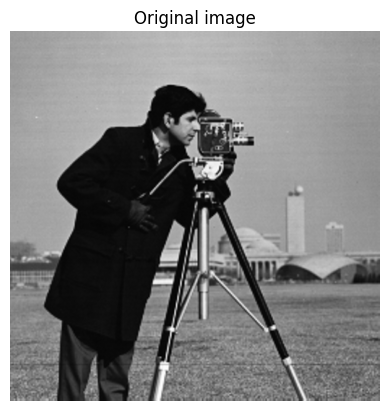

In [3]:
img = cv2.imread("/content/ImageProcessingLab-main/bin/camera.png", cv2.IMREAD_GRAYSCALE)
img = img.astype(np.float32)

plt.imshow(img, cmap="gray")
plt.title("Original image")
plt.axis("off")


EX1

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

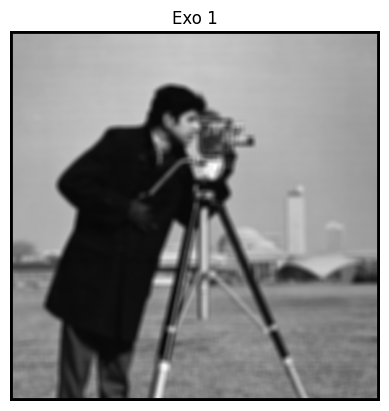

In [ ]:
def mean_filter(image, k):
    h, w = image.shape
    result = np.zeros_like(image)
    ws = 2*k + 1
    total = ws**2
    for y in range(k, h - k):
      for x in range(k, w - k):
        s = 0.0
        for j in range(-k,k+1):
          for i in range(-k,k+1):
            s = s + image[y + j, x + i]
        result[y, x] = s / total

    return result

img2 = mean_filter(img, 4)
plt.imshow(img2, cmap="gray")
plt.title("Exo 1")
plt.axis("off")

np.zeros_like used to make a copy of the img with zeros

why (k, h-k) ? -> to make the filtre matrix start at the image and not outside of it (ref : https://arxiv.org/pdf/1603.07285)

to use (0, h) we need to make the new image in image.shape + k ???

Exo 2

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

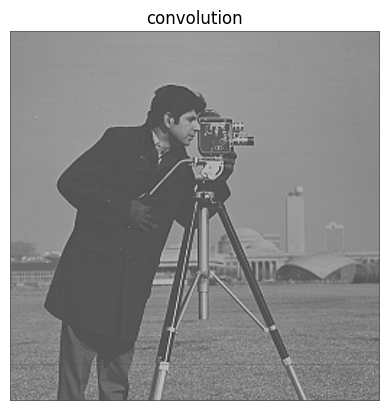

In [ ]:
def convolution(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    k = kh // 2

    result = np.zeros_like(image)

    for y in range(k, h - k):
        for x in range(k, w - k):
            s = 0.0
            for j in range(-k, k+1):
                for i in range(-k, k+1):
                    s += image[y + j, x + i] * kernel[j + k, i + k]
            result[y, x] = s

    return result
kernel = np.array([
    [ 0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
], dtype=np.float32)
conv = convolution(img, kernel)

plt.imshow(conv, cmap="gray")
plt.title("convolution")
plt.axis("off")


EXO 3

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

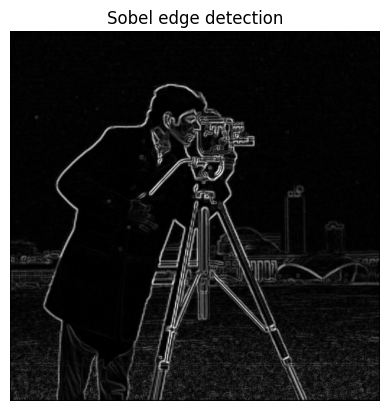

In [ ]:
def sobel_edge(image):
    Gx = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]], dtype=np.float32)

    Gy = np.array([[ 1,  0, -1],
                   [ 2,  0, -2],
                   [ 1,  0, -1]], dtype=np.float32)

    dx = convolution(image, Gx)
    dy = convolution(image, Gy)

    magnitude = np.abs(dx) + np.abs(dy)
    return magnitude

edges = sobel_edge(img)

plt.imshow(edges, cmap="gray")
plt.title("Sobel edge detection")
plt.axis("off")


EX 4

EX 5

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

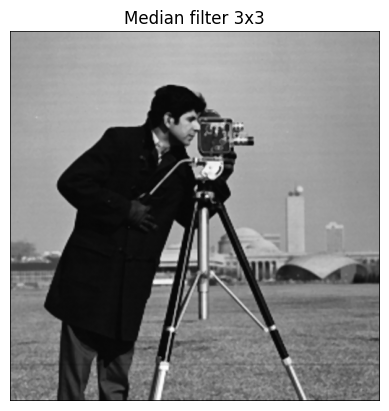

In [ ]:
def median_filter(image, k):
    h, w = image.shape
    result = np.zeros_like(image)

    for y in range(k, h - k):
        for x in range(k, w - k):
            values = []
            for j in range(-k, k+1):
                for i in range(-k, k+1):
                    values.append(image[y + j, x + i])
            values.sort()
            result[y, x] = values[len(values)//2]

    return result

median_img = median_filter(img, k=1)

plt.imshow(median_img, cmap="gray")
plt.title("Median filter 3x3")
plt.axis("off")


PARTIE 2

EX 1



(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

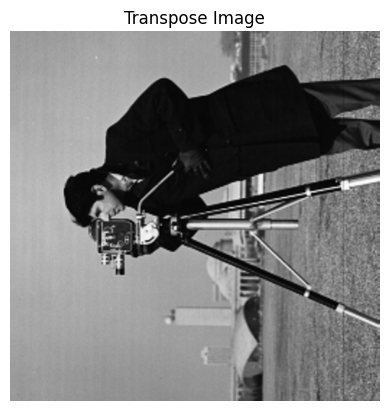

In [22]:
def transpose(image):
    h, w = image.shape
    result = np.zeros((w, h), dtype=image.dtype)

    for y in range(h):
        for x in range(w):
            result[x, y] = image[y, x]

    return result

tr_img = transpose(img)

plt.imshow(tr_img, cmap="gray")
plt.title("Transpose Image")
plt.axis("off")


EX 2

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

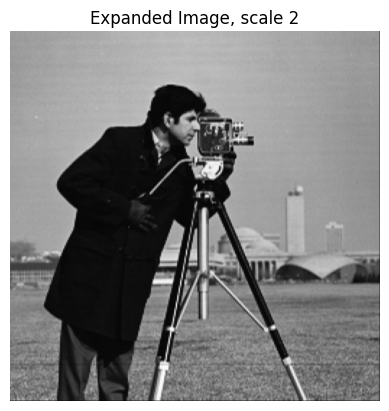

In [24]:
def interpolate_nearest(image, x, y):
    h, w = image.shape
    xi = int(round(x))
    yi = int(round(y))

    if 0 <= yi < h and 0 <= xi < w:
        return image[yi, xi]
    return 0

def expand_nearest(image, scale):
    h, w = image.shape
    new_h = int(h * scale)
    new_w = int(w * scale)

    result = np.zeros((new_h, new_w), dtype=image.dtype)

    for y in range(new_h):
        for x in range(new_w):
            src_x = x / scale
            src_y = y / scale
            result[y, x] = interpolate_nearest(image, src_x, src_y)

    return result

ex_img = expand_nearest(img, 2)

plt.imshow(ex_img, cmap="gray")
plt.title("Expanded Image, scale 2")
plt.axis("off")


ex 3

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

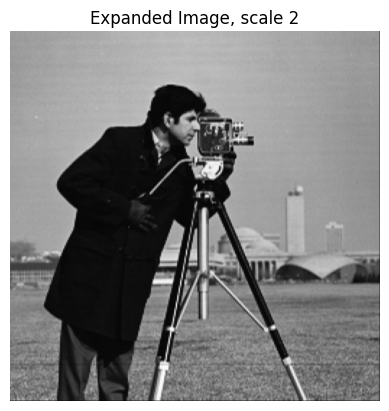

In [25]:
def interpolate_bilinear(image, x, y):
    h, w = image.shape

    x1 = int(np.floor(x))
    y1 = int(np.floor(x))
    x2 = x1 + 1
    y2 = y1 + 1

    if x1 < 0 or y1 < 0 or x2 >= w or y2 >= h:
      return 0
    alpha = x - x1
    beta = y - y1
    return (1-alpha)*(1-beta)*image[x1, y1] + alpha*(1-beta)*image[x2, y1] + (1-alpha)*beta*image[x1, y2] + alpha*beta*image[x2, y2]


def expand_bilinear(image, scale):
    h, w = image.shape
    new_h = int(h * scale)
    new_w = int(w * scale)

    result = np.zeros((new_h, new_w), dtype=np.float32)

    for y in range(new_h):
        for x in range(new_w):
            src_x = x / scale
            src_y = y / scale
            result[y, x] = interpolate_bilinear(image, src_x, src_y)

    return result

ex_img2 = expand_nearest(img, 2)

plt.imshow(ex_img2, cmap="gray")
plt.title("Expanded Image, scale 2")
plt.axis("off")


EX 4

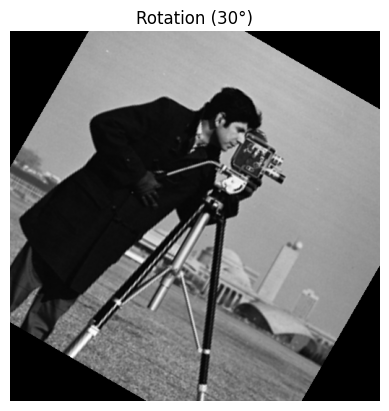

In [30]:
def rotate(image, angle):
    h, w = image.shape
    result = np.zeros((h, w), dtype=np.float32)

    cx = w / 2.0
    cy = h / 2.0

    cos_t = np.cos(angle)
    sin_t = np.sin(angle)

    for y in range(h):
        for x in range(w):
            xd = x - cx
            yd = y - cy

            xs = cos_t * xd + sin_t * yd + cx
            ys = -sin_t * xd + cos_t * yd + cy

            result[y, x] = interpolate_bilinear(image, xs, ys)

    return result


img = img.astype(np.float32)

ro_img = rotate(img, np.pi / 6)  # 30 degrees

plt.imshow(ro_img, cmap="gray")
plt.title("Rotation (30°)")
plt.axis("off")
plt.show()
